<a href="https://colab.research.google.com/github/sjnaj/DeepLearning/blob/master/Basic/stablity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

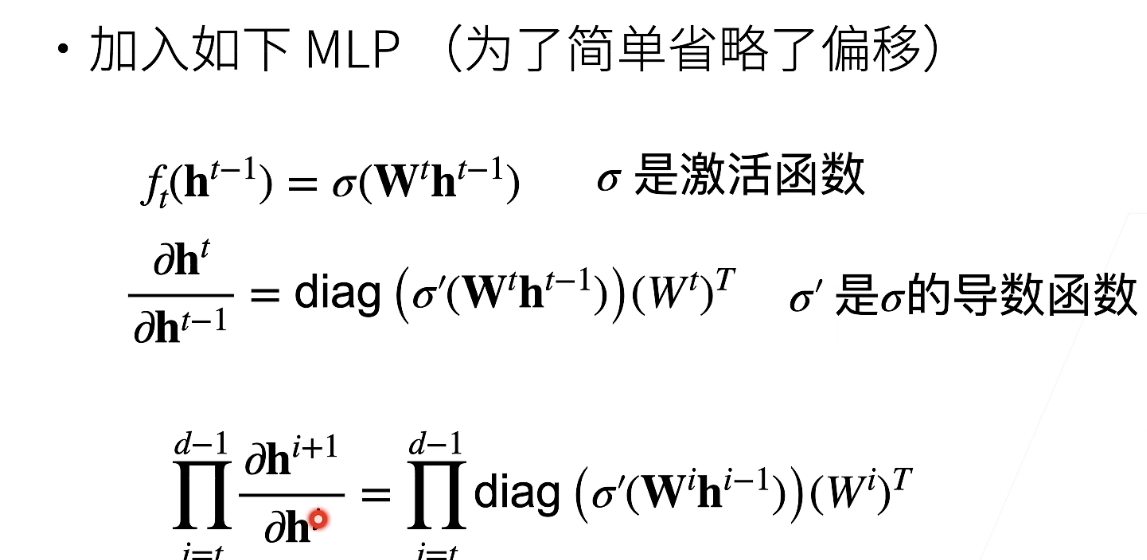

对角阵那里相当于按元素乘，向量的每个元素作用于右侧矩阵的每一列

他们的乘积可能非常大，也可能非常小。

不稳定梯度带来的风险不止在于数值表示； 不稳定梯度也威胁到我们优化算法的稳定性。 我们可能面临一些问题。 要么是梯度爆炸（gradient exploding）问题： 参数更新过大，破坏了模型的稳定收敛； 要么是梯度消失（gradient vanishing）问题： 参数更新过小，在每次更新时几乎不会移动，导致模型无法学习。

梯度消失

In [ ]:
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l


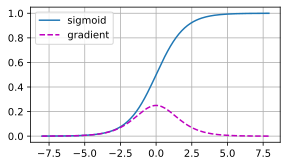

In [5]:
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.sum().backward()
#等价于y.backward(torch.ones_like(x))
'''如果是标量对向量求导(scalar对tensor求导)，那么就可以保证上面的计算图的根节点只有一个，此时不用引入grad_tensors参数，直接调用backward函数即可

如果是(向量)矩阵对(向量)矩阵求导(tensor对tensor求导)，实际上是先求出Jacobian矩阵中每一个元素的梯度值(每一个元素的梯度值的求解过程对应上面的计算图的求解方法)，然后将这个Jacobian矩阵与grad_tensors参数对应的矩阵进行对应的点乘，得到最终的结果。
'''

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))#Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

当sigmoid函数的输入很大或是很小时，它的梯度都会消失。
此外，当反向传播通过许多层时，除非我们在刚刚好的地方，
这些地方sigmoid函数的输入接近于零，否则整个乘积的梯度可能会消失。
当我们的网络有很多层时，除非我们很小心，否则在某一层可能会切断梯度。
事实上，这个问题曾经困扰着深度网络的训练。
因此，更稳定的ReLU系列函数已经成为从业者的默认选择

梯度爆炸

In [8]:
m=torch.normal(0,1,(4,4))
print("一个矩阵：",m)
for i in range(100):
  m@=torch.normal(0,1,(4,4))

print("乘以一百个矩阵之后",m)


一个矩阵： tensor([[ 1.5073, -0.2146,  0.1743,  0.7213],
        [-0.8240,  1.3462, -0.2344, -1.0772],
        [-0.1951,  0.7815,  0.1144,  0.0223],
        [ 1.7234, -2.2319,  0.4759,  0.5979]])
乘以一百个矩阵之后 tensor([[ 9.0882e+20, -1.7489e+21, -1.6609e+20, -1.3885e+21],
        [-2.0300e+20,  3.9064e+20,  3.7096e+19,  3.1013e+20],
        [ 1.8481e+20, -3.5563e+20, -3.3768e+19, -2.8234e+20],
        [ 7.4914e+20, -1.4416e+21, -1.3691e+20, -1.1445e+21]])
